In [40]:
!pip install pandas openpyxl
!pip install wordcloud
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter
import re
from wordcloud import WordCloud
import sweetviz as sv

In [23]:
# Se lee el excel de las ordenes de producción
df_op= pd.read_csv('https://raw.githubusercontent.com/ivandiaz25/Proyecto-FB/master/BD%20PSL/Info_Ordenes%20de%20producci%C3%B3n.csv',  sep=',', encoding='latin-1')

# Muestra las primeras filas del dataframe 
df_op.head()

,Tipo de Consecutivo,Orden de Produccion,Producto,Nombre Producto,Tipo de Pedido,Consecutivo del Pedido,Orden Cliente,Material,NombreMaterial,Cliente,Codigo Estado OP,Nombre Estado,Proceso1
0,FBREP,107,PD0001920,CDNA ELEV FB 26200-G4-C2-P200,PV01,24629,4500607341:,PD0001920A,PTNA INT 10X64.5X284,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920
1,FBREP,107,PD0001920,CDNA ELEV FB 26200-G4-C2-P200,PV01,24629,4500607341:,PD0001920B,PTNA PIN 10X64.5X284,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920
2,FBREP,107,PD0001920,CDNA ELEV FB 26200-G4-C2-P200,PV01,24629,4500607341:,PD0001920C,PTNA CAB ADIT 10X120X284,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920
3,FBREP,107,PD0001920,CDNA ELEV FB 26200-G4-C2-P200,PV01,24629,4500607341:,PD0001920D,BUJE ØE34.05XØI24.55X77,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920
4,FBREP,107,PD0001920,CDNA ELEV FB 26200-G4-C2-P200,PV01,24629,4500607341:,PD0001920E,PASADOR 28X25.05X120.2 CP/PER,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920


In [24]:
# Se lee el excel de las actividades por ordenes de producción
df_op_act= pd.read_csv('https://raw.githubusercontent.com/ivandiaz25/Proyecto-FB/master/BD%20PSL/info_OP_Actividades.csv',  sep=',', encoding='latin-1')

# Muestra las primeras filas del dataframe 
df_op_act.head()

,TipoOp,ConsOP,Actividad,Descripcion Actividad,Version,Comentario,Proceso
0,FBREP,486,CARB,CARBURIZAR,1,CARBURIZAR A 930°C POR 4 HORAS\nDEJAR ENFRIAR ...,30586248A5
1,FBREP,415,MECA5,MECANIZAR5,1,FRESAR AGUJEROS POR EL LADO ADITAMENTO\nAVELLANAR,30392656D
2,FBREP,476,MECA5,MECANIZAR5,2,MECANIZAR LADO PASO:\nFRESAR AGUJERO\nAVELLANAR\n,30607413C
3,FBREP,414,MECA5,MECANIZAR5,1,FRESAR AGUJEROS POR EL LADO ADITAMENTO\nAVELLANAR,30392656C
4,FBREP,334,BROCH,BROCHAR,3,AGUJERO SEMIREDONDO\n\n\n\n,54987-1B


In [25]:
#Visualizamos la base de ordenes de producción

print('Existen en total ', len(df_op.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de ordenes de producción:")
print(df_op.head())

print("\nInformación de la base de OP:")
print(df_op.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_op.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  13 columnas en la base de datos.

Primeras filas de la base de ordenes de producción:
  Tipo de Consecutivo  Orden de Produccion   Producto  \
0               FBREP                  107  PD0001920   
1               FBREP                  107  PD0001920   
2               FBREP                  107  PD0001920   
3               FBREP                  107  PD0001920   
4               FBREP                  107  PD0001920   

                 Nombre Producto Tipo de Pedido  Consecutivo del Pedido  \
0  CDNA ELEV FB 26200-G4-C2-P200           PV01                   24629   
1  CDNA ELEV FB 26200-G4-C2-P200           PV01                   24629   
2  CDNA ELEV FB 26200-G4-C2-P200           PV01                   24629   
3  CDNA ELEV FB 26200-G4-C2-P200           PV01                   24629   
4  CDNA ELEV FB 26200-G4-C2-P200           PV01                   24629   

  Orden Cliente    Material                 NombreMaterial  \
0   4500607341:  PD0001920A           PT

In [26]:
#Visualizamos la base de ordenes de producción

print('Existen en total ', len(df_op_act.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de ordenes de producción:")
print(df_op_act.head())

print("\nInformación de la base de OP:")
print(df_op_act.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_op_act.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  7 columnas en la base de datos.

Primeras filas de la base de ordenes de producción:
  TipoOp  ConsOP Actividad Descripcion Actividad  Version  \
0  FBREP     486      CARB            CARBURIZAR        1   
1  FBREP     415     MECA5            MECANIZAR5        1   
2  FBREP     476     MECA5            MECANIZAR5        2   
3  FBREP     414     MECA5            MECANIZAR5        1   
4  FBREP     334     BROCH               BROCHAR        3   

                                          Comentario     Proceso  
0  CARBURIZAR A 930°C POR 4 HORAS\nDEJAR ENFRIAR ...  30586248A5  
1  FRESAR AGUJEROS POR EL LADO ADITAMENTO\nAVELLANAR   30392656D  
2  MECANIZAR LADO PASO:\nFRESAR AGUJERO\nAVELLANAR\n   30607413C  
3  FRESAR AGUJEROS POR EL LADO ADITAMENTO\nAVELLANAR   30392656C  
4                        AGUJERO SEMIREDONDO\n\n\n\n    54987-1B  

Información de la base de OP:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 7 c

Aunque ambas bases de datos existe algunos datos nulos, en realidad no afectan en la consistencia a la BD porque estan en la variable de comentarios, por lo tanto no afectaria directamente porque esas celdas pueden llenarse o no, para tratarlas se rellenará con N/R.

**Analizaremos la base de datos de ordenes de producción.**

In [28]:
# verificamos el tamaño de la base de datos. 
df_op.shape

(296, 13)

In [29]:
# Verificamos cuantos las columnas.
df_op.columns

Index(['Tipo de Consecutivo', 'Orden de Produccion', 'Producto',
       'Nombre Producto', 'Tipo de Pedido', 'Consecutivo del Pedido',
       'Orden Cliente', 'Material', 'NombreMaterial', 'Cliente',
       'Codigo Estado OP', 'Nombre Estado', 'Proceso1'],
      dtype='object')

In [30]:
#Ahora observamos cuantos valores unicos tiene cada varibale
df_op.nunique()

Tipo de Consecutivo         1
Orden de Produccion       165
Producto                  141
Nombre Producto           138
Tipo de Pedido              1
Consecutivo del Pedido     36
Orden Cliente              41
Material                  188
NombreMaterial            185
Cliente                    14
Codigo Estado OP            2
Nombre Estado               2
Proceso1                  141
dtype: int64

Por lo tanto se tomará la variable Producto como la primary key o identificado de la base y procesarlas en función de ella.

Tambien se tomará valores unicos para la "orden de producción" esto debido a que pueden apareces varios codigos para la orden de producción, sin embargo todos hacen referencia a la mismma pieza ya sea general (tipo cadena) o el conjunto de partes (pernos, tuercas, chumaceras, etc.)

In [32]:
# Elimina las filas duplicadas basadas en la columna "Orden de Producción"
df_op2 = df_op.drop_duplicates(subset=['Orden de Produccion'])

# Muestra el DataFrame resultante
print(df_op2)


    Tipo de Consecutivo  Orden de Produccion    Producto  \
0                 FBREP                  107   PD0001920   
7                 FBREP                  108  PD0001920A   
8                 FBREP                  109  PD0001920B   
9                 FBREP                  110  PD0001920C   
10                FBREP                  111  PD0001920D   
..                  ...                  ...         ...   
279               FBREP                   82  PD0001754P   
281               FBREP                   86  PD0001754F   
282               FBREP                   87  PD0001754I   
294               FBREP                   88  PD0001754V   
295               FBREP                   89  1ACI050002   

                       Nombre Producto Tipo de Pedido  Consecutivo del Pedido  \
0        CDNA ELEV FB 26200-G4-C2-P200           PV01                   24629   
7                 PTNA INT 10X64.5X284           PV01                   24629   
8                 PTNA PIN 10X64.5X2

In [33]:
#verificamos el tamaño 
df_op2

,Tipo de Consecutivo,Orden de Produccion,Producto,Nombre Producto,Tipo de Pedido,Consecutivo del Pedido,Orden Cliente,Material,NombreMaterial,Cliente,Codigo Estado OP,Nombre Estado,Proceso1
0,FBREP,107,PD0001920,CDNA ELEV FB 26200-G4-C2-P200,PV01,24629,4500607341:,PD0001920A,PTNA INT 10X64.5X284,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920
7,FBREP,108,PD0001920A,PTNA INT 10X64.5X284,PV01,24629,4500607341:,MP000844,SSN LAM 10,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920A
8,FBREP,109,PD0001920B,PTNA PIN 10X64.5X284,PV01,24629,4500607341:,MP000844,SSN LAM 10,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920B
9,FBREP,110,PD0001920C,PTNA CAB ADIT 10X120X284,PV01,24629,4500607341:,MP000844,SSN LAM 10,890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920C
10,FBREP,111,PD0001920D,BUJE ØE34.05XØI24.55X77,PV01,24629,4500607341:,MP000204,"8620 RDO 34,9 (1 3/8)",890100251 - CEMENTOS ARGOS S.A.,FI,Finalizada,PD0001920D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,FBREP,82,PD0001754P,SOLD. PTNA EXT PIN ADIT ANG DE,PV01,23904,4506523995:::,PD0001754O,SOLD. PTNA EXT PIN ADIT,72-0296500 - CEMEX INC.,FI,Finalizada,PD0001754P
281,FBREP,86,PD0001754F,PASADOR 38.1X36.15X188.1 CP,PV01,23904,4506523995:::,MP000172,"4140 RDO 38,1 (1 1/2)",72-0296500 - CEMEX INC.,CE,Cerrado,PD0001754F
282,FBREP,87,PD0001754I,ENS. RUEDA GUIA CDNA,PV01,23904,4506523995:::,PD0001754Q,SELLO MACHO 4.5X60.7 BRONCE,72-0296500 - CEMEX INC.,FI,Finalizada,PD0001754I
294,FBREP,88,PD0001754V,PASADOR 38.1X36.15X186.8 CP/PERF,PV01,23904,4506523995:::,MP000172,"4140 RDO 38,1 (1 1/2)",72-0296500 - CEMEX INC.,FI,Finalizada,PD0001754V


Ahora en "Nombre Producto" se encuentra el detalle del producto a fabricar y los elementos que se requieren para poder fabricar el componenten principal llamese cadena, eslabon, etc.

In [34]:
df_op2.nunique()

Tipo de Consecutivo         1
Orden de Produccion       165
Producto                  141
Nombre Producto           138
Tipo de Pedido              1
Consecutivo del Pedido     36
Orden Cliente              41
Material                   84
NombreMaterial             83
Cliente                    14
Codigo Estado OP            2
Nombre Estado               2
Proceso1                  141
dtype: int64

In [39]:
# borramos las columnas que no nos agregan tanta información: 
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ['Tipo de Consecutivo', 'Tipo de Pedido', 'Codigo Estado OP', 'Nombre Estado']

# Elimina las columnas especificadas
df_op_3 = df_op2.drop(columns=columnas_a_eliminar)

# Muestra el DataFrame resultante
df_op_3.head()


,Orden de Produccion,Producto,Nombre Producto,Consecutivo del Pedido,Orden Cliente,Material,NombreMaterial,Cliente,Proceso1
0,107,PD0001920,CDNA ELEV FB 26200-G4-C2-P200,24629,4500607341:,PD0001920A,PTNA INT 10X64.5X284,890100251 - CEMENTOS ARGOS S.A.,PD0001920
7,108,PD0001920A,PTNA INT 10X64.5X284,24629,4500607341:,MP000844,SSN LAM 10,890100251 - CEMENTOS ARGOS S.A.,PD0001920A
8,109,PD0001920B,PTNA PIN 10X64.5X284,24629,4500607341:,MP000844,SSN LAM 10,890100251 - CEMENTOS ARGOS S.A.,PD0001920B
9,110,PD0001920C,PTNA CAB ADIT 10X120X284,24629,4500607341:,MP000844,SSN LAM 10,890100251 - CEMENTOS ARGOS S.A.,PD0001920C
10,111,PD0001920D,BUJE ØE34.05XØI24.55X77,24629,4500607341:,MP000204,"8620 RDO 34,9 (1 3/8)",890100251 - CEMENTOS ARGOS S.A.,PD0001920D


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprec


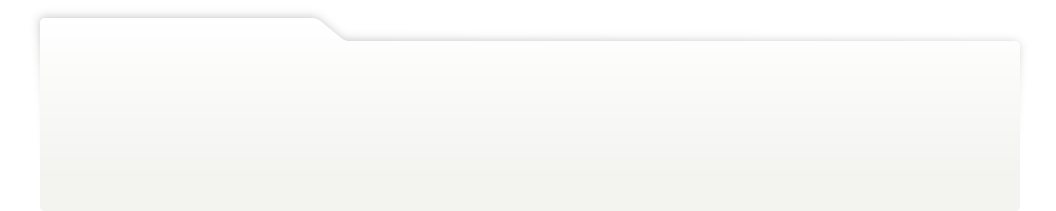
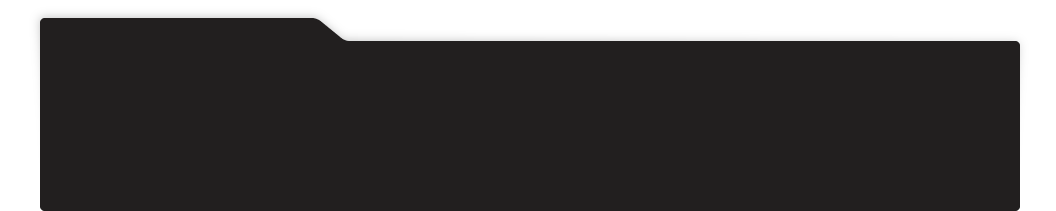
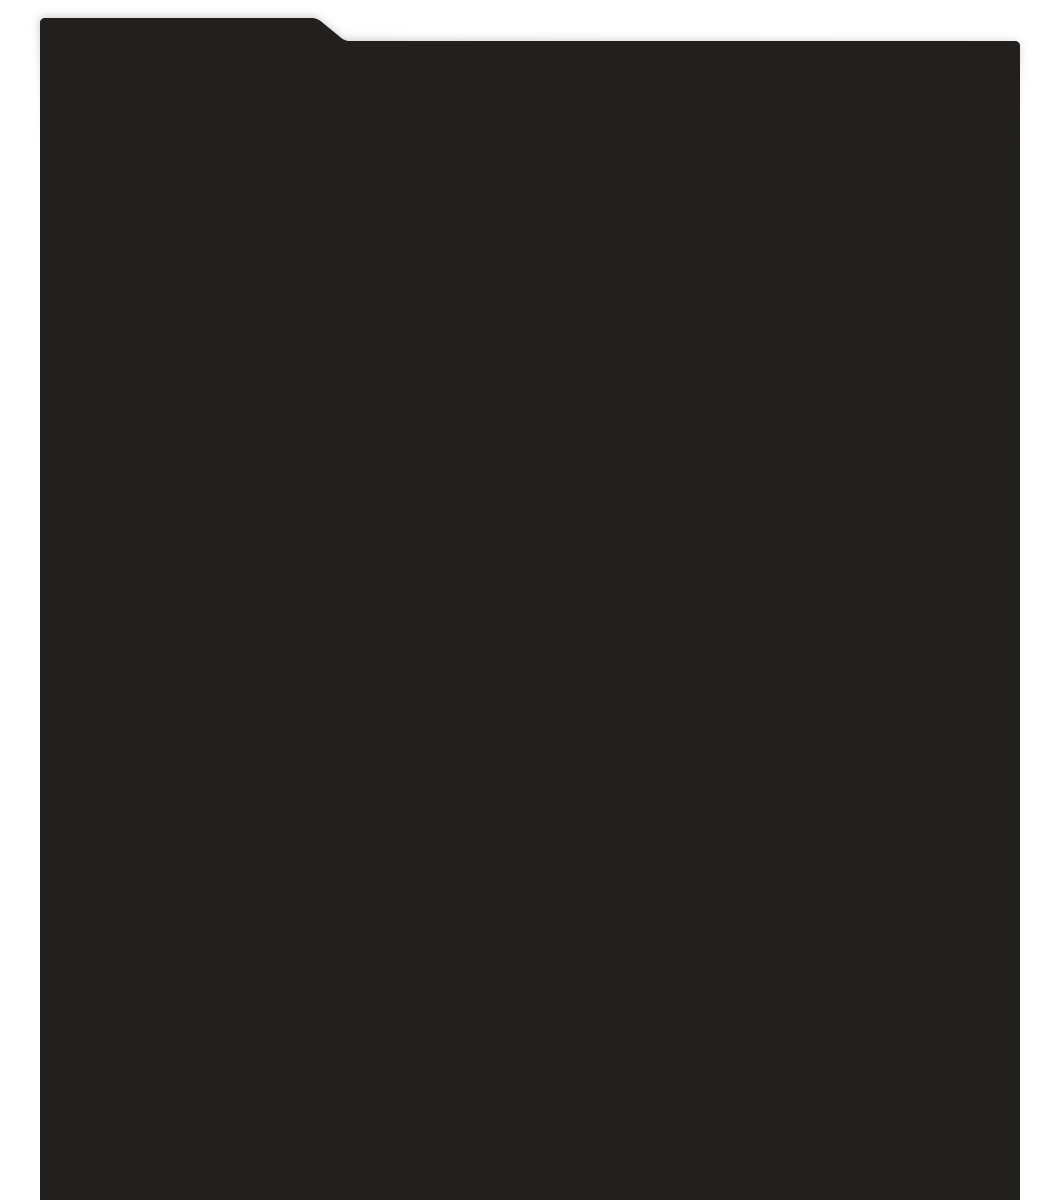
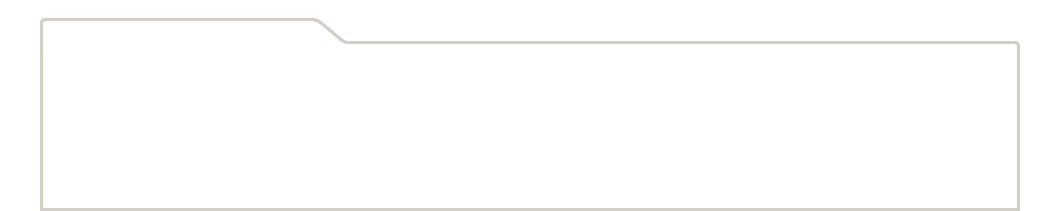
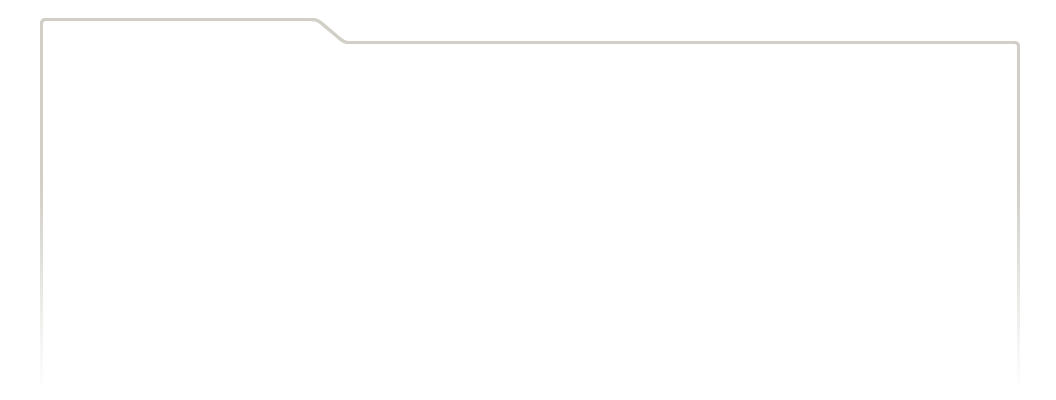
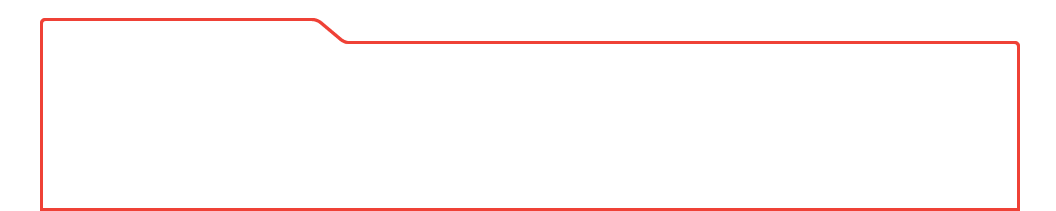
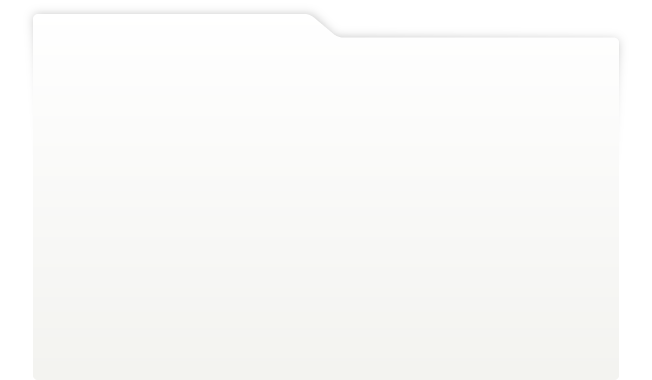
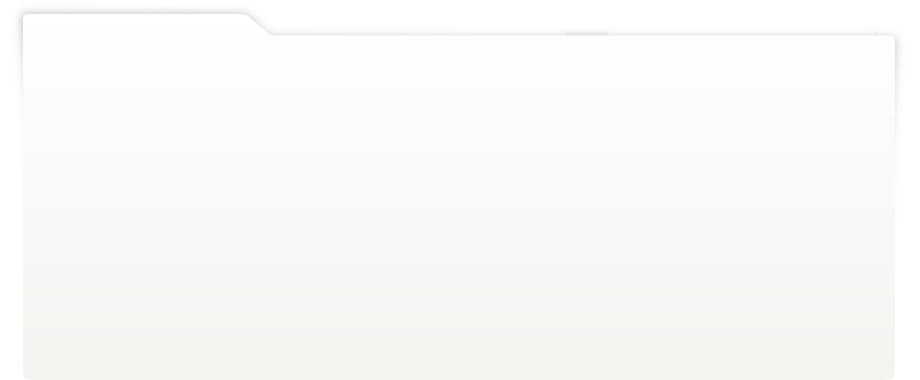
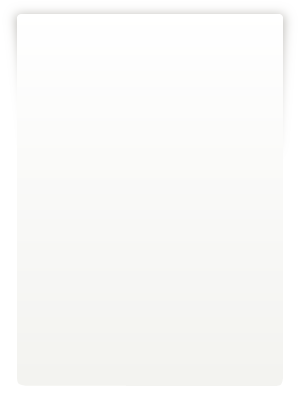
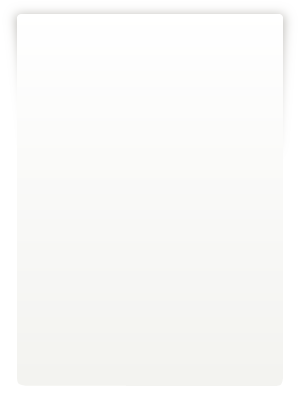
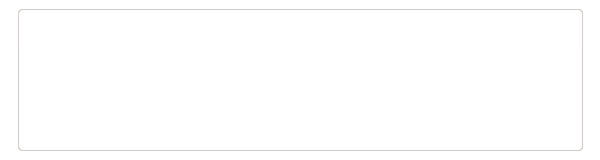
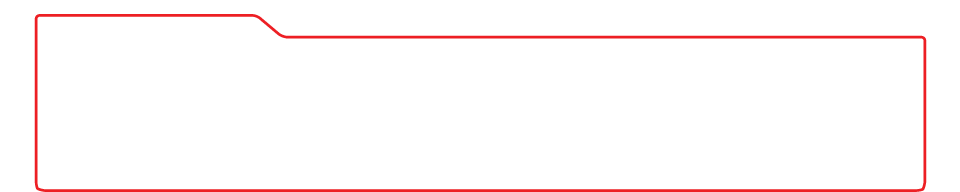
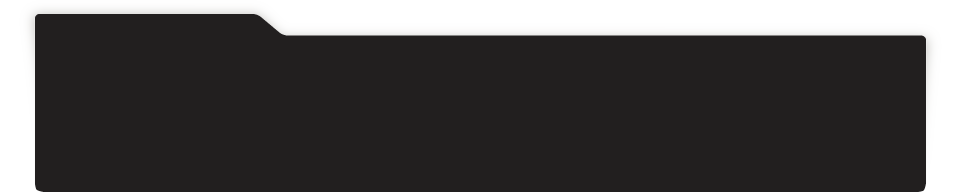
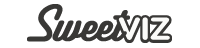
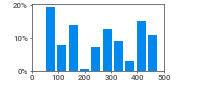
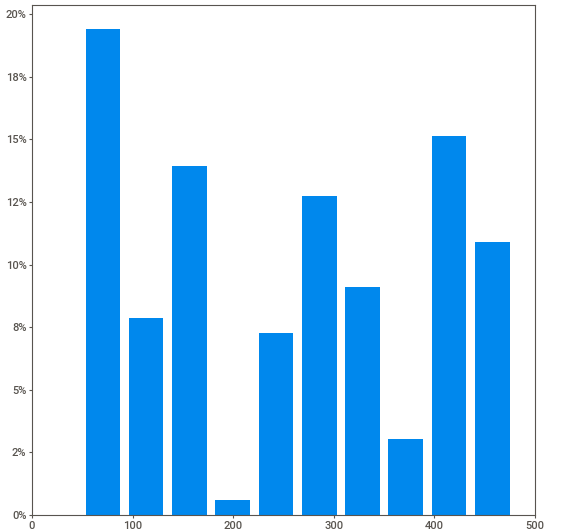
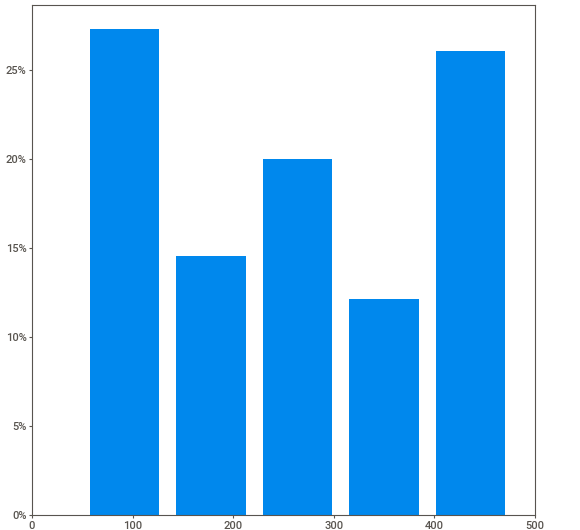
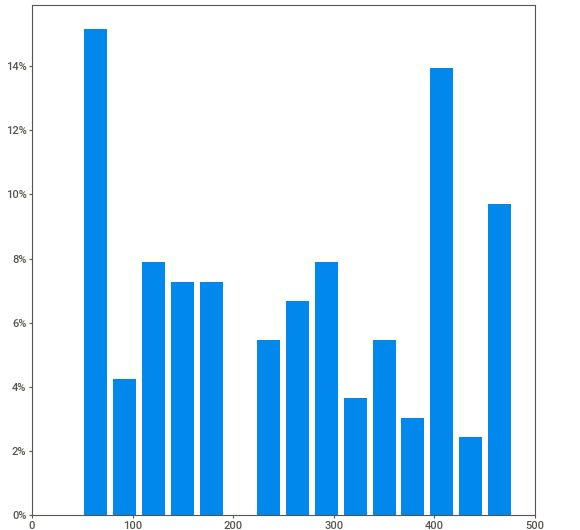
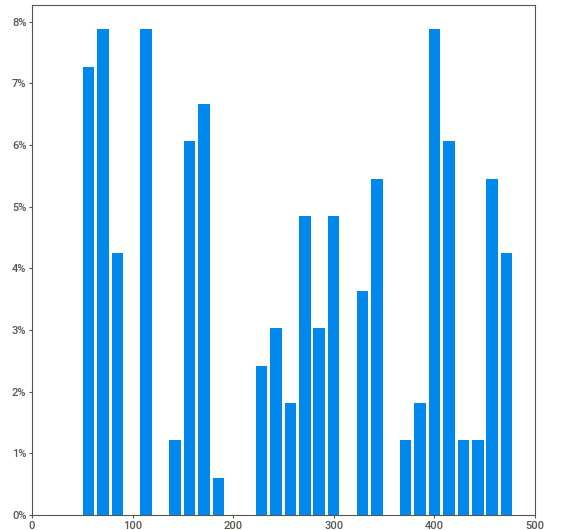
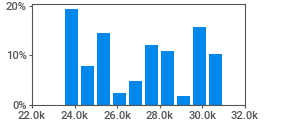
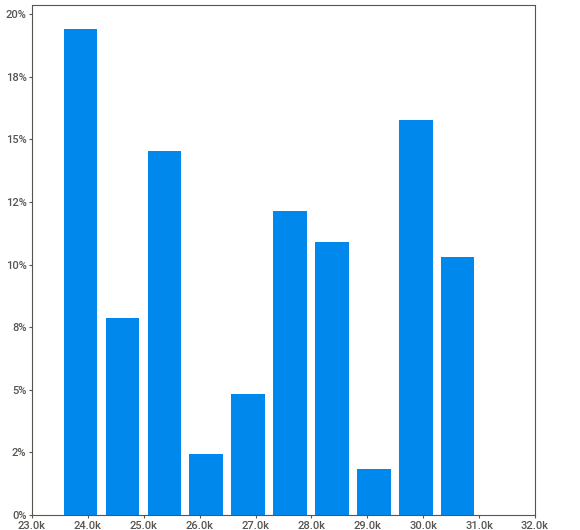
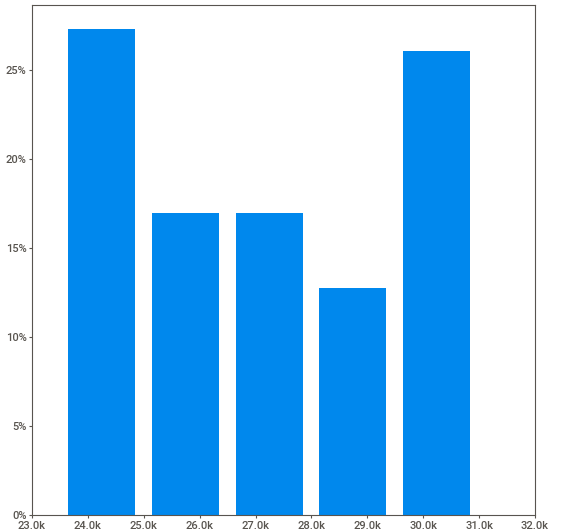
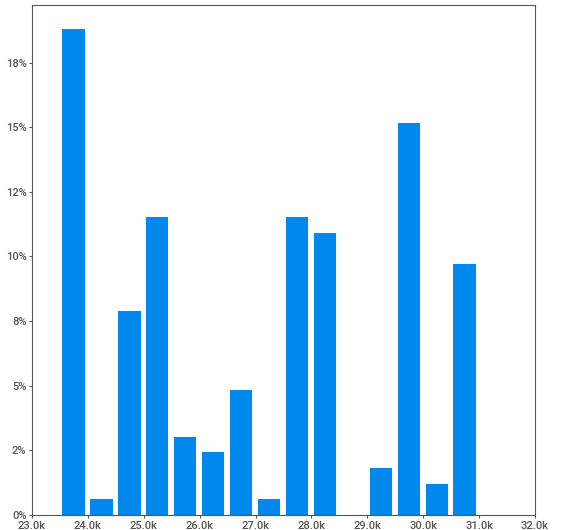
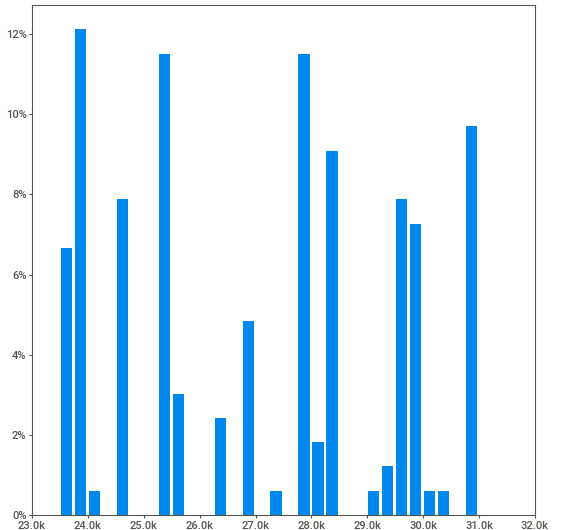
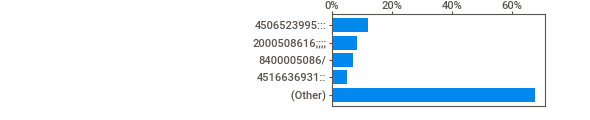
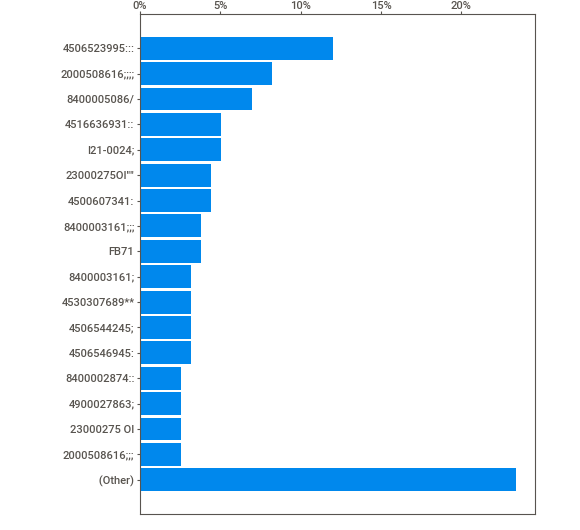
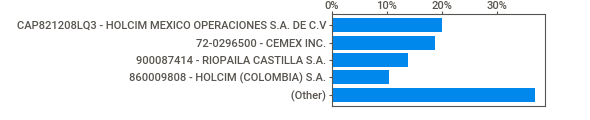
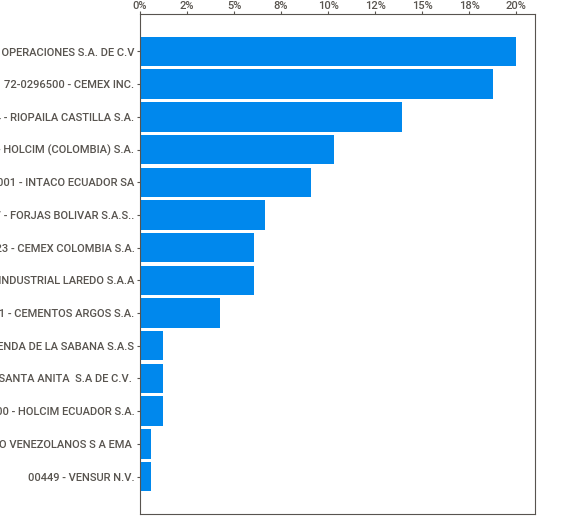
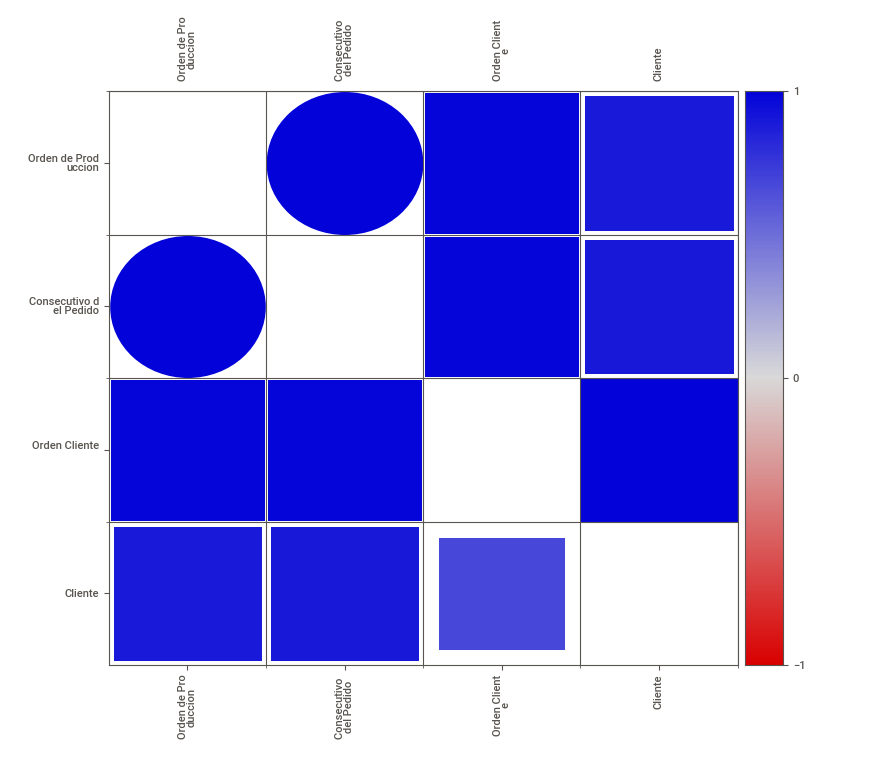
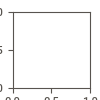

In [43]:
#Exploración rápida de las variables de la BD ordenes de producción
rgd = sv.analyze(df_op_3)
rgd.show_notebook()

Al momento tenemos lo siguiente: 

Producto es el identificador que nos va a permitir desplazarnos entre bases de datos, debido a que es el codigo unico para cada productos general ensamblado o individual.

Nombre Producto: Es el nombre de las piezas a fabricar, sin emabrgo a este punto es algo dificil procesra la información que esta aqui, porque no es muy entendible como se podrian agrupar estos nombres por ejemplo: en la variable aparecen varios nombre para cadena (CDNA, CADENA), pero cuando se revisa el identificado (producto) se tiene que algunas aparecen solo con numeros (1000245028) y otros tiene unas letras en la parte delantera (PD0001920) esto nos da a entender que son tipo de cadenas diferentes, puedo suponer entonces que hay codigos de cadena segun el tipo ( tablillas, canguilones, etc,) por lo tanto para poder hacer un buen analisis en este punto es necesario conocer que significa el listado o la nomencltaura que se le da en ese listado y poder agrupar o segregar las piezas. 

Consecutivo del Pedido: Esta varible agrupa de forma general el conjunto de piezas a realizar y el ensamble, es decir, se tiene un ensamble de cadena y esta cadena tiene 10 partes, entonces tanto el esamble como las 10 partes tienen el mismo consecutivo de pedido. 

Ahora, tambien hay que analizar porque hay piezas que no parecen tener alguna relación con un cojunto de piezas o un ensambles, por ejemplo: BUJE FORJADO 56.65X77X85.72 con codigo de producto 6000036, si se analiza el codigo no parece tener una relación directa o formar parte de un conjunto debido a que el codigo no pertenece a uno general como puede ser uno de cadena, analizando ademas el consecutivo pedido este es independiente (27745) y no parece estar relacionados con otros.



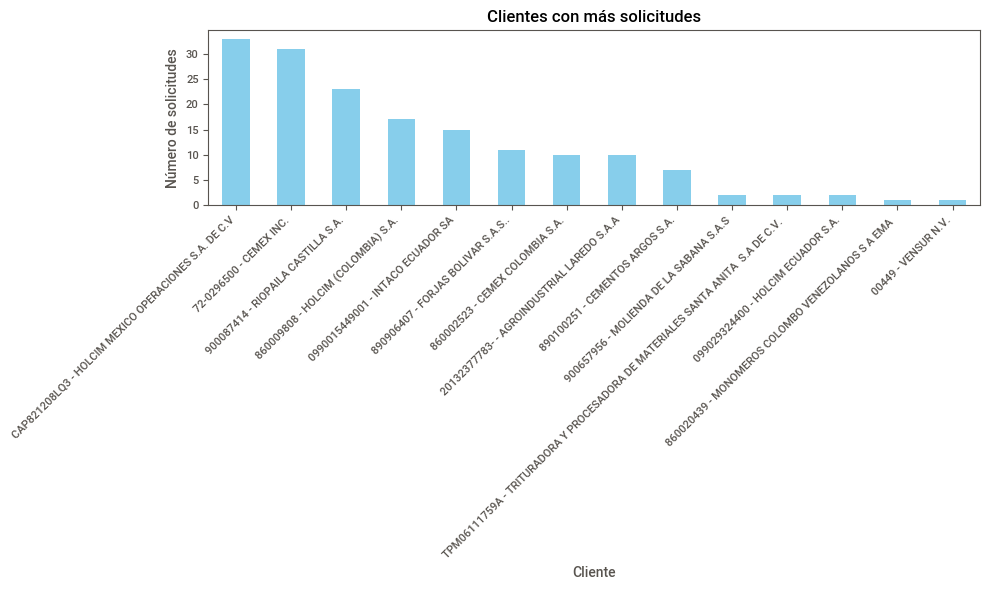

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_op_3 es tu DataFrame con la estructura correcta

# 1. Calcular el número de solicitudes por cliente
solicitudes_por_cliente = df_op_3['Cliente'].value_counts()

# 2. Ordenar los clientes por el número de solicitudes en orden descendente
solicitudes_por_cliente = solicitudes_por_cliente.sort_values(ascending=False)

# 3. Graficar los resultados
plt.figure(figsize=(10, 6))
solicitudes_por_cliente.plot(kind='bar', color='skyblue')
plt.xlabel('Cliente')
plt.ylabel('Número de solicitudes')
plt.title('Clientes con más solicitudes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ahroa en  la base de datos de actividades por ordenes de producción (df_op_act) se encuentra el detallado de cada procedimiento que se debe realizar para generar las piezas y esta relacionado con el "ConsOP" que en la df_op corresponde a la "orden de producción" y "Proceso" que en la df_op corresponde a "Proceso".

Se debe analizar la idoniedad de esta base de datos para el modelo, pues solo comprende metodos de fabriación y el seguimiento para fabricar piezas.